In [4]:
from pandas import read_csv
from numpy import mean
from matplotlib.pyplot import show , xlabel , ylabel , plot , title , figure , legend
from tensorflow.keras import layers , models
from tensorflow.keras.metrics import mean_absolute_error , mean_squared_error
from tensorflow.data import Dataset

In [5]:
path = "D:\\datasets\\Turkey-Mugla\\Ula.csv"
file = read_csv(path)
df = file.copy()
df.head(10)

,ID,Date,Location,Latitude,Longtitude,Magnitude,Depth,Record date
0,1,1/2/2005 13:01,ULA (MUGLA),37.0107,28.3512,3.2,26.4,01:52.4
1,2,1/3/2005 21:47,ULA (MUGLA),37.0028,28.3713,3.0,26.8,01:52.4
2,3,1/7/2005 3:03,ULA (MUGLA),37.0973,28.3055,3.0,3.0,01:52.4
3,4,1/9/2005 19:29,ULA (MUGLA),37.1323,28.3905,2.8,13.0,01:52.4
4,5,1/10/2005 16:43,ULA (MUGLA),37.0347,28.3732,3.3,11.9,01:52.4
5,6,1/10/2005 21:31,ULA (MUGLA),37.0405,28.3290,3.0,3.8,01:52.4
6,7,1/11/2005 22:23,ULA (MUGLA),36.9655,28.4178,3.0,26.7,01:52.4
7,8,1/11/2005 23:56,ULA (MUGLA),37.0068,28.3693,3.3,29.0,01:52.4
8,9,1/14/2005 21:08,ULA (MUGLA),37.0647,28.3188,4.1,6.7,01:52.4
9,10,1/17/2005 22:36,ULA (MUGLA),36.9970,28.3230,2.7,27.4,01:52.4


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5103 entries, 0 to 5102
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           5103 non-null   int64  
 1   Date         5103 non-null   object 
 2   Location     5103 non-null   object 
 3   Latitude     5103 non-null   float64
 4   Longtitude   5103 non-null   float64
 5   Magnitude    5103 non-null   float64
 6   Depth        5103 non-null   float64
 7   Record date  5103 non-null   object 
dtypes: float64(4), int64(1), object(3)
memory usage: 319.1+ KB


# working on Magnitude column

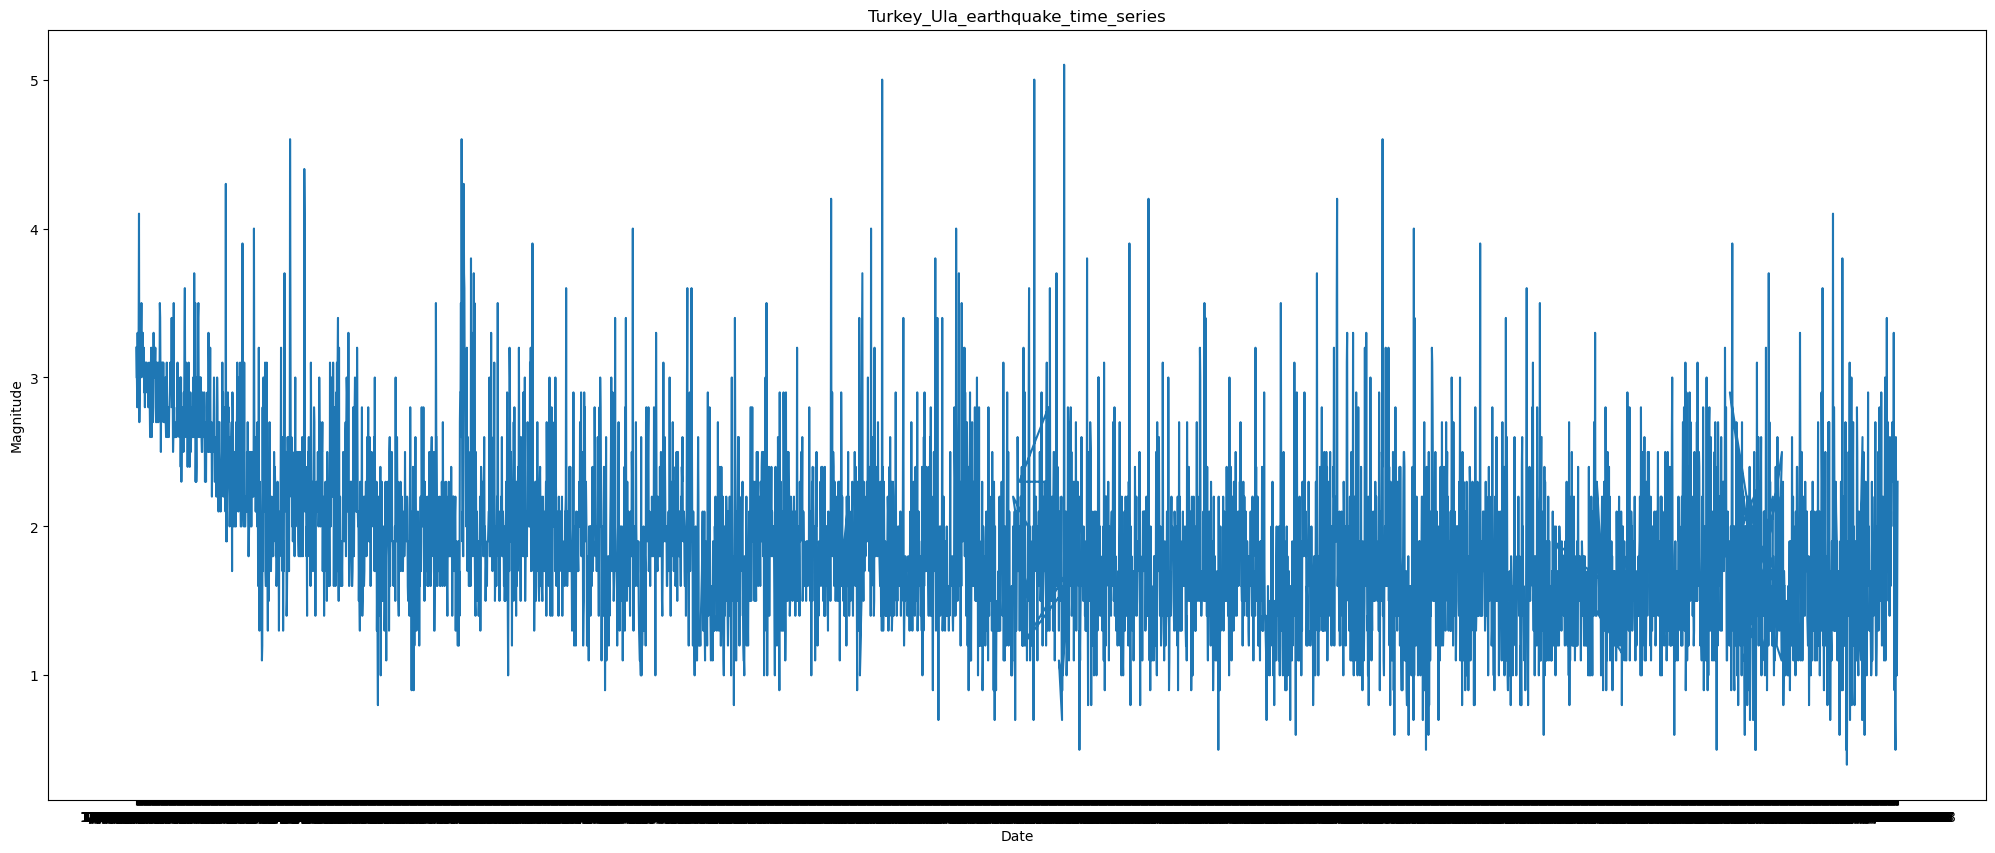

In [7]:
figure(figsize=(25,10))
plot(df.Date,df.Magnitude)
xlabel('Date')
ylabel('Magnitude')
title('Turkey_Ula_earthquake_time_series')
show()

In [8]:
idx = (int(input('Enter train size:'))*len(df))//100
xtr = df.Magnitude.to_list()[:idx]
xts = df.Magnitude.to_list()[idx:]

Enter train size:80


In [9]:
if len(xtr)+len(xts)==len(df):
    print(f'Train size: {len(xtr)}\nTest size: {len(xts)}')

Train size: 4082
Test size: 1021


In [10]:
dataset_tr = Dataset.from_tensor_slices(xtr)
dataset_tr = dataset_tr.window(30,shift=1,drop_remainder=True)
dataset_tr = dataset_tr.flat_map(lambda x : x.batch(30))
dataset_tr = dataset_tr.map(lambda x :(x[:-1],x[-1]))
dataset_tr = dataset_tr.shuffle(30)
dataset_tr = dataset_tr.batch(60).prefetch(1)

In [11]:
dataset_ts = Dataset.from_tensor_slices(df.Magnitude.to_list())
dataset_ts = dataset_ts.window(30,shift=1,drop_remainder=True)
dataset_ts = dataset_ts.flat_map(lambda x : x.batch(30))
dataset_ts = dataset_ts.batch(60).prefetch(1)

In [12]:
def Create_model()->None :
    '''function docstring'''
    model = models.Sequential([layers.SimpleRNN(40,activation='relu',return_sequences=True,input_shape=[None,1]),
                               layers.SimpleRNN(40,activation='relu'),
                               layers.Dense(1)])
    model.compile(optimizer='rmsprop',
                  loss='mse',
                  metrics=['mae'])
    return model

In [13]:
history = Create_model().fit(dataset_tr,epochs=100)

Epoch 1/100
68/68 [==============================] - 1s 7ms/step - loss: 1.8688 - mae: 0.8075
Epoch 2/100
68/68 [==============================] - 0s 6ms/step - loss: 0.3070 - mae: 0.4117
Epoch 3/100
68/68 [==============================] - 0s 6ms/step - loss: 0.2908 - mae: 0.4027
Epoch 4/100
68/68 [==============================] - 0s 4ms/step - loss: 0.2890 - mae: 0.4013
Epoch 5/100
68/68 [==============================] - 0s 4ms/step - loss: 0.2787 - mae: 0.3918
Epoch 6/100
68/68 [==============================] - 0s 4ms/step - loss: 0.2681 - mae: 0.3858
Epoch 7/100
68/68 [==============================] - 0s 4ms/step - loss: 0.2714 - mae: 0.3876
Epoch 8/100
68/68 [==============================] - 0s 4ms/step - loss: 0.2633 - mae: 0.3784
Epoch 9/100
68/68 [==============================] - 0s 4ms/step - loss: 0.2675 - mae: 0.3841
Epoch 10/100
68/68 [==============================] - 0s 4ms/step - loss: 0.2631 - mae: 0.3824
Epoch 11/100
68/68 [==============================] - 0s 4m

68/68 [==============================] - 0s 4ms/step - loss: 0.2099 - mae: 0.3421
Epoch 88/100
68/68 [==============================] - 0s 4ms/step - loss: 0.2068 - mae: 0.3395
Epoch 89/100
68/68 [==============================] - 0s 4ms/step - loss: 0.2081 - mae: 0.3407
Epoch 90/100
68/68 [==============================] - 0s 4ms/step - loss: 0.2056 - mae: 0.3407
Epoch 91/100
68/68 [==============================] - 0s 4ms/step - loss: 0.2033 - mae: 0.3376
Epoch 92/100
68/68 [==============================] - 0s 4ms/step - loss: 0.2060 - mae: 0.3412
Epoch 93/100
68/68 [==============================] - 0s 4ms/step - loss: 0.2049 - mae: 0.3393
Epoch 94/100
68/68 [==============================] - 0s 4ms/step - loss: 0.2007 - mae: 0.3346
Epoch 95/100
68/68 [==============================] - 0s 4ms/step - loss: 0.2004 - mae: 0.3347
Epoch 96/100
68/68 [==============================] - 0s 4ms/step - loss: 0.2004 - mae: 0.3354
Epoch 97/100
68/68 [==============================] - 0s 4ms/st

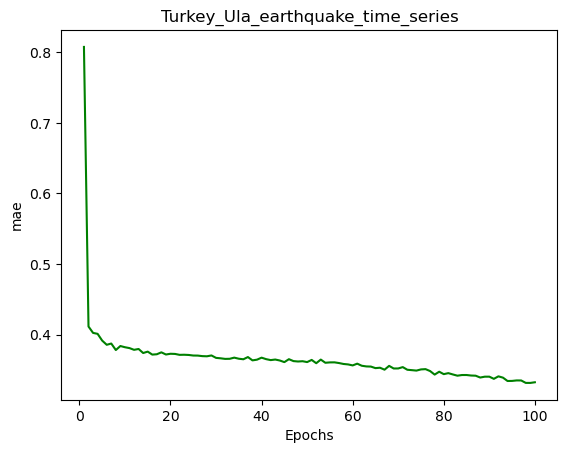

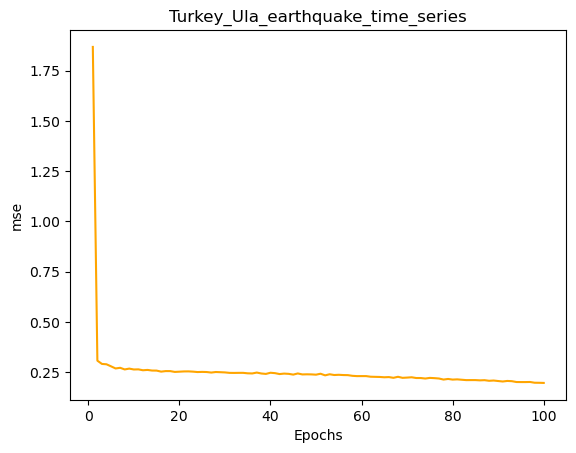

In [14]:
#Visualize models performance.
epoch = range(1,len(history.epoch)+1)
results = history.history
plot(epoch,results['mae'],'green')
xlabel('Epochs')
ylabel('mae')
title('Turkey_Ula_earthquake_time_series')
show()
plot(epoch,results['loss'],'orange')
xlabel('Epochs')
ylabel('mse')
title('Turkey_Ula_earthquake_time_series')
show()

In [32]:
preds_ts = Create_model().predict(dataset_ts)
true_preds = preds_ts[idx-30:-1]
mse = mean(mean_squared_error(xts,true_preds).numpy()[0])
mae = mean(mean_absolute_error(xts,true_preds).numpy()[0])
message = 'mse : %2.f , mae : %2.f'%(mse,mae)
print(message)

85/85 [==============================] - 0s 4ms/step
mse :  1 , mae :  1


In [33]:
temp = []
for i in true_preds.ravel():
    if i<0 :
        temp.append(0)
        continue
    temp.append(i)
true_preds = temp

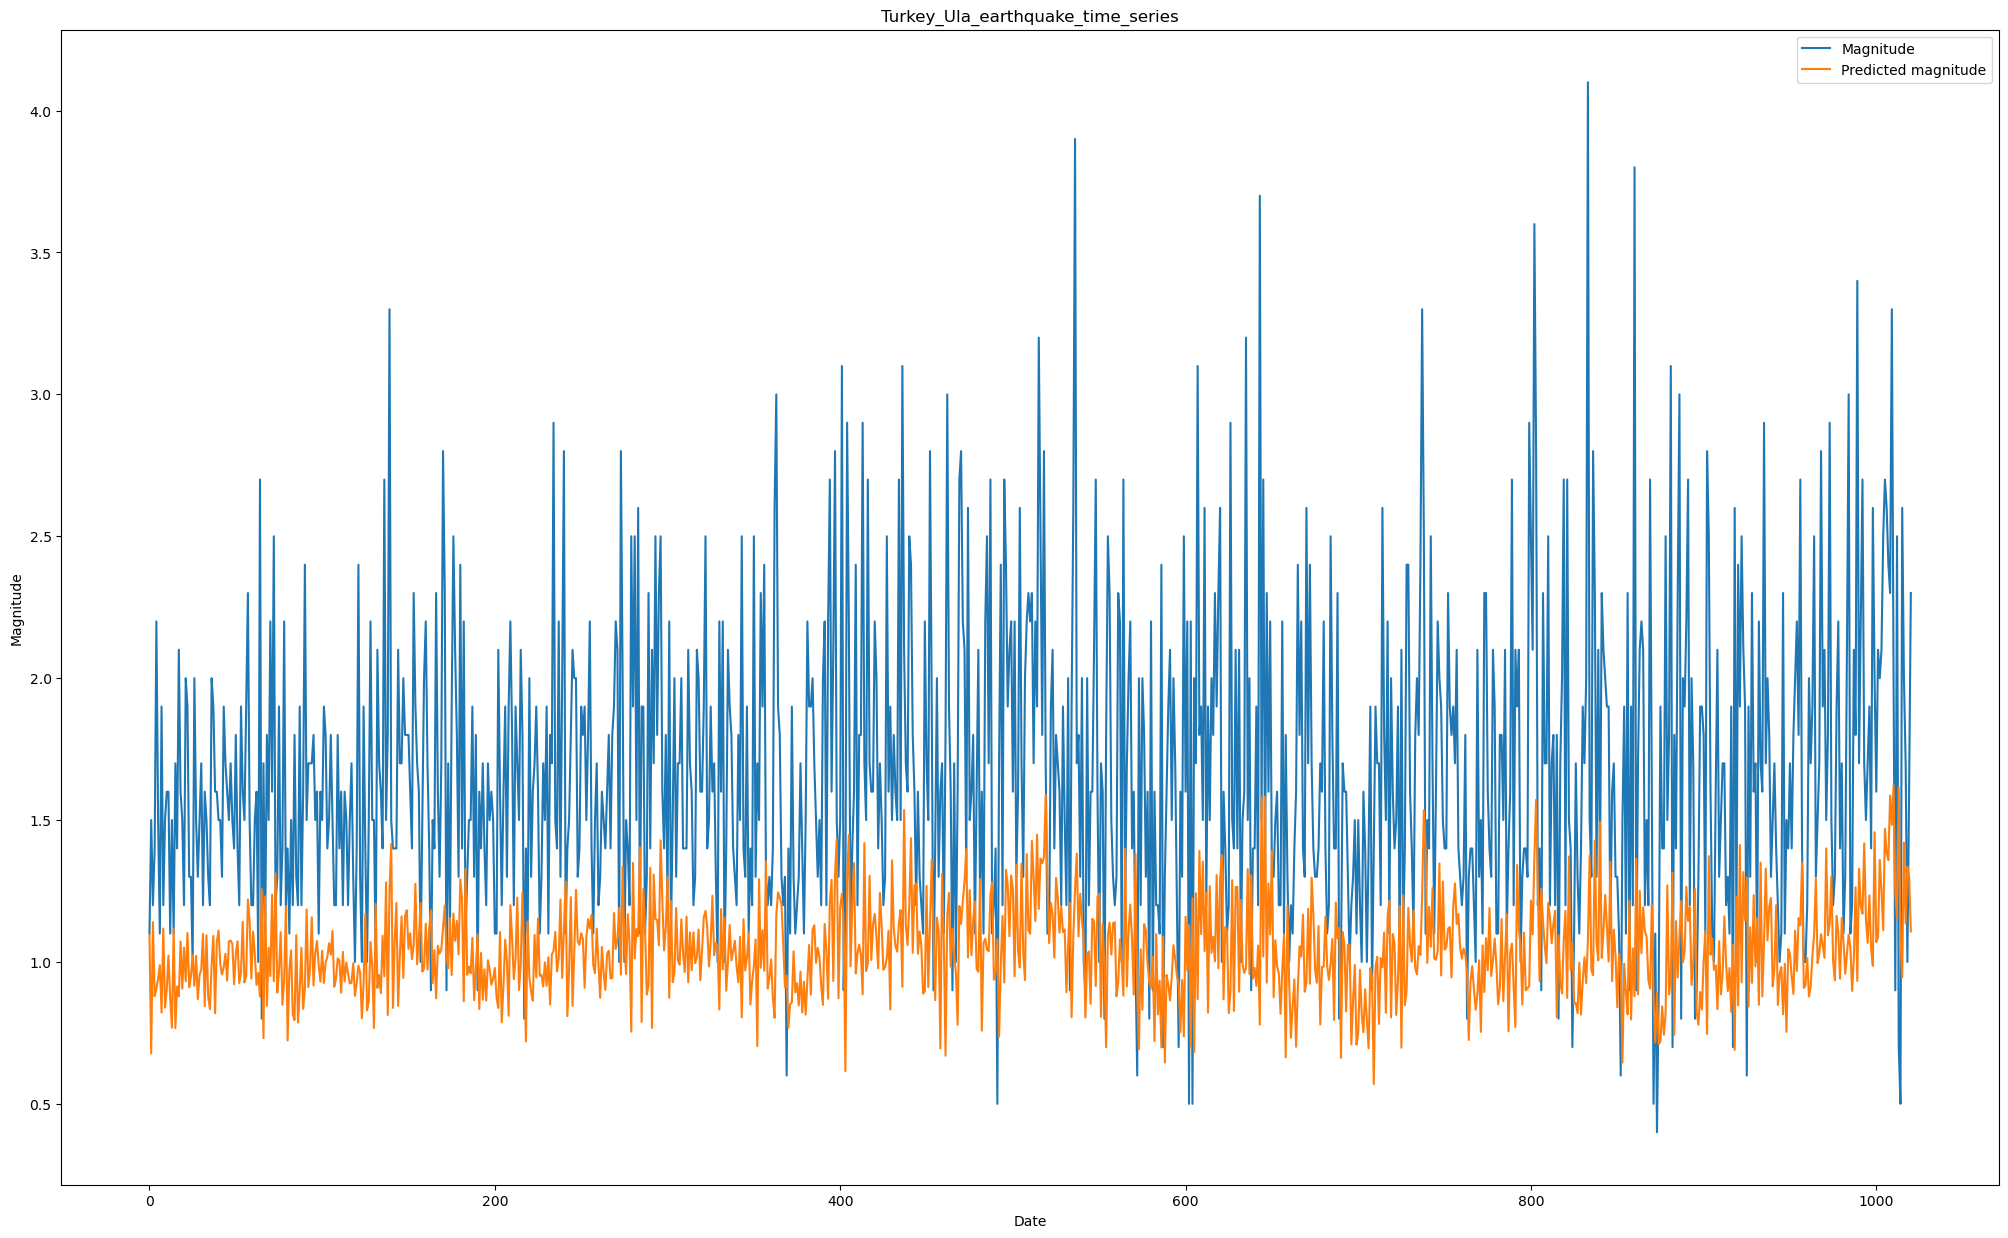

In [34]:
figure(figsize=(25,15))
plot(range(len(xts)),xts)
plot(range(len(true_preds)),true_preds)
title('Turkey_Ula_earthquake_time_series')
xlabel('Date')
ylabel('Magnitude')
legend(['Magnitude','Predicted magnitude'])
show()

# working on Depth column

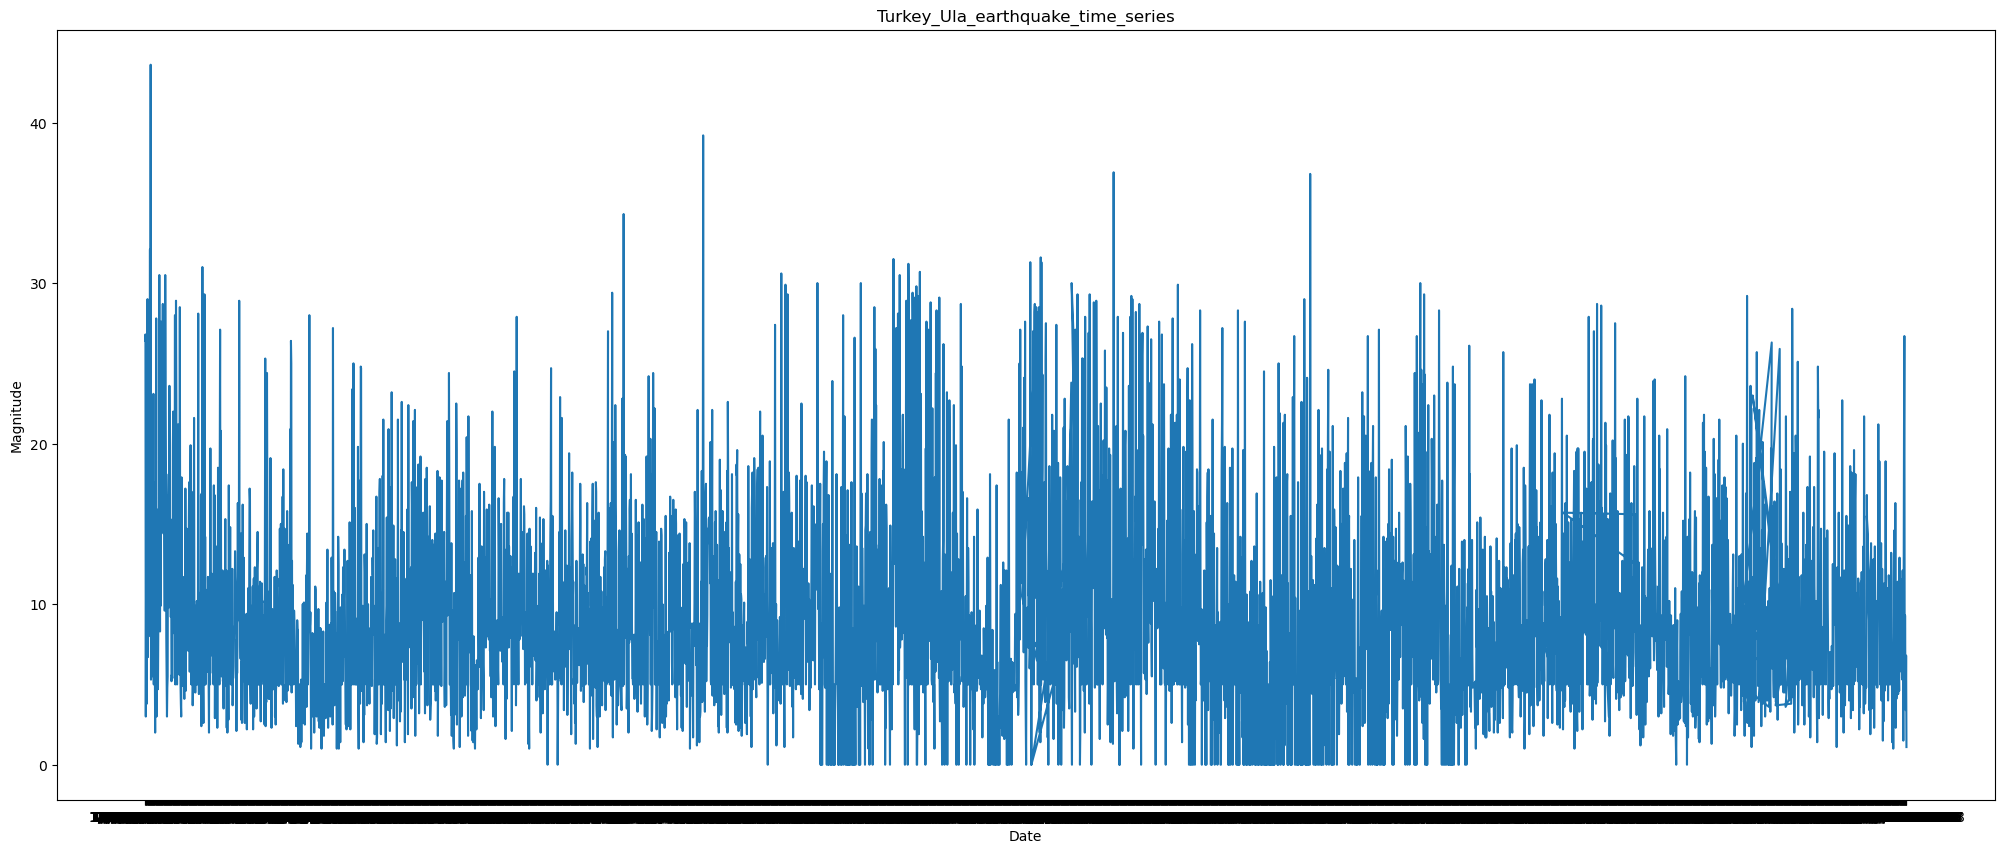

In [35]:
figure(figsize=(25,10))
plot(df.Date,df.Depth)
xlabel('Date')
ylabel('Magnitude')
title('Turkey_Ula_earthquake_time_series')
show()

In [36]:
idx = (int(input('Enter train size:'))*len(df))//100
xtr = df.Depth.to_list()[:idx]
xts = df.Depth.to_list()[idx:]

Enter train size:80


In [37]:
if len(xtr)+len(xts)==len(df):
    print(f'Train size: {len(xtr)}\nTest size: {len(xts)}')

Train size: 4082
Test size: 1021


In [38]:
dataset_tr = Dataset.from_tensor_slices(xtr)
dataset_tr = dataset_tr.window(30,shift=1,drop_remainder=True)
dataset_tr = dataset_tr.flat_map(lambda x : x.batch(30))
dataset_tr = dataset_tr.map(lambda x :(x[:-1],x[-1]))
dataset_tr = dataset_tr.shuffle(30)
dataset_tr = dataset_tr.batch(60).prefetch(1)

In [39]:
dataset_ts = Dataset.from_tensor_slices(df.Depth.to_list())
dataset_ts = dataset_ts.window(30,shift=1,drop_remainder=True)
dataset_ts = dataset_ts.flat_map(lambda x : x.batch(30))
dataset_ts = dataset_ts.batch(60).prefetch(1)

In [40]:
def Create_model2()->None :
    '''function docstring'''
    model = models.Sequential([layers.SimpleRNN(40,activation='relu',return_sequences=True,input_shape=[None,1]),
                               layers.SimpleRNN(40,activation='relu',return_sequences=True),
                               layers.SimpleRNN(40,activation='relu'),
                               layers.Dense(1)])
    model.compile(optimizer='rmsprop',
                  loss='mse',
                  metrics=['mae'])
    return model

In [41]:
history = Create_model2().fit(dataset_tr,epochs=100)

Epoch 1/100
68/68 [==============================] - 2s 9ms/step - loss: 45.6484 - mae: 5.0870
Epoch 2/100
68/68 [==============================] - 1s 8ms/step - loss: 39.8315 - mae: 4.8156
Epoch 3/100
68/68 [==============================] - 1s 7ms/step - loss: 39.2563 - mae: 4.7884
Epoch 4/100
68/68 [==============================] - 0s 6ms/step - loss: 38.9151 - mae: 4.7709
Epoch 5/100
68/68 [==============================] - 0s 5ms/step - loss: 38.9383 - mae: 4.7907
Epoch 6/100
68/68 [==============================] - 0s 6ms/step - loss: 38.6669 - mae: 4.7580
Epoch 7/100
68/68 [==============================] - 0s 5ms/step - loss: 38.1045 - mae: 4.7370
Epoch 8/100
68/68 [==============================] - 0s 5ms/step - loss: 38.2521 - mae: 4.7560
Epoch 9/100
68/68 [==============================] - 0s 5ms/step - loss: 37.8600 - mae: 4.7254
Epoch 10/100
68/68 [==============================] - 0s 6ms/step - loss: 37.4853 - mae: 4.7149
Epoch 11/100
68/68 [=============================

68/68 [==============================] - 0s 6ms/step - loss: 20.5368 - mae: 3.5340
Epoch 87/100
68/68 [==============================] - 0s 6ms/step - loss: 20.4662 - mae: 3.5225
Epoch 88/100
68/68 [==============================] - 0s 6ms/step - loss: 19.6591 - mae: 3.4402
Epoch 89/100
68/68 [==============================] - 0s 6ms/step - loss: 19.2808 - mae: 3.4164
Epoch 90/100
68/68 [==============================] - 0s 5ms/step - loss: 20.1235 - mae: 3.4655
Epoch 91/100
68/68 [==============================] - 0s 5ms/step - loss: 19.4839 - mae: 3.4262
Epoch 92/100
68/68 [==============================] - 0s 5ms/step - loss: 19.7538 - mae: 3.4534
Epoch 93/100
68/68 [==============================] - 0s 5ms/step - loss: 19.8367 - mae: 3.4503
Epoch 94/100
68/68 [==============================] - 0s 5ms/step - loss: 18.8142 - mae: 3.3676
Epoch 95/100
68/68 [==============================] - 0s 5ms/step - loss: 18.6181 - mae: 3.3559
Epoch 96/100
68/68 [==============================] -

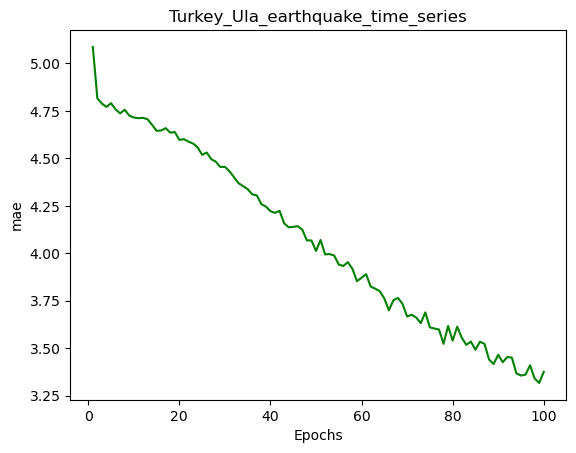

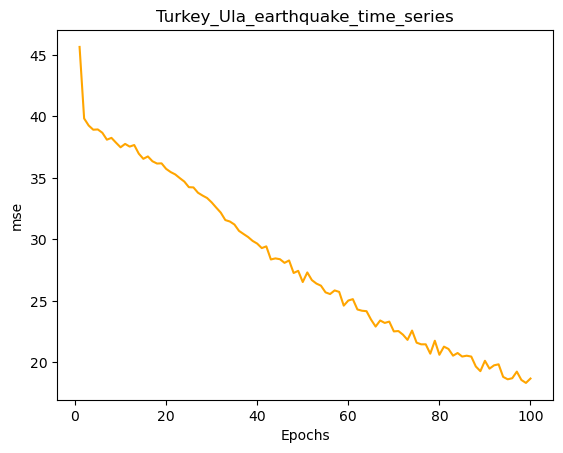

In [42]:
#Visualize models performance.
epoch = range(1,len(history.epoch)+1)
results = history.history
plot(epoch,results['mae'],'green')
xlabel('Epochs')
ylabel('mae')
title('Turkey_Ula_earthquake_time_series')
show()
plot(epoch,results['loss'],'orange')
xlabel('Epochs')
ylabel('mse')
title('Turkey_Ula_earthquake_time_series')
show()

In [53]:
preds_ts = Create_model2().predict(dataset_ts)
true_preds = preds_ts[idx-30:-1]
mse = mean(mean_squared_error(xts,true_preds).numpy()[0])
mae = mean(mean_absolute_error(xts,true_preds).numpy()[0])
message = 'mse : %2.f , mae : %2.f'%(mse,mae)
print(message)

85/85 [==============================] - 1s 9ms/step
mse : 48 , mae :  5


In [54]:
temp = []
for i in true_preds.ravel():
    if i<0 :
        temp.append(0)
        continue
    temp.append(i)
true_preds = temp

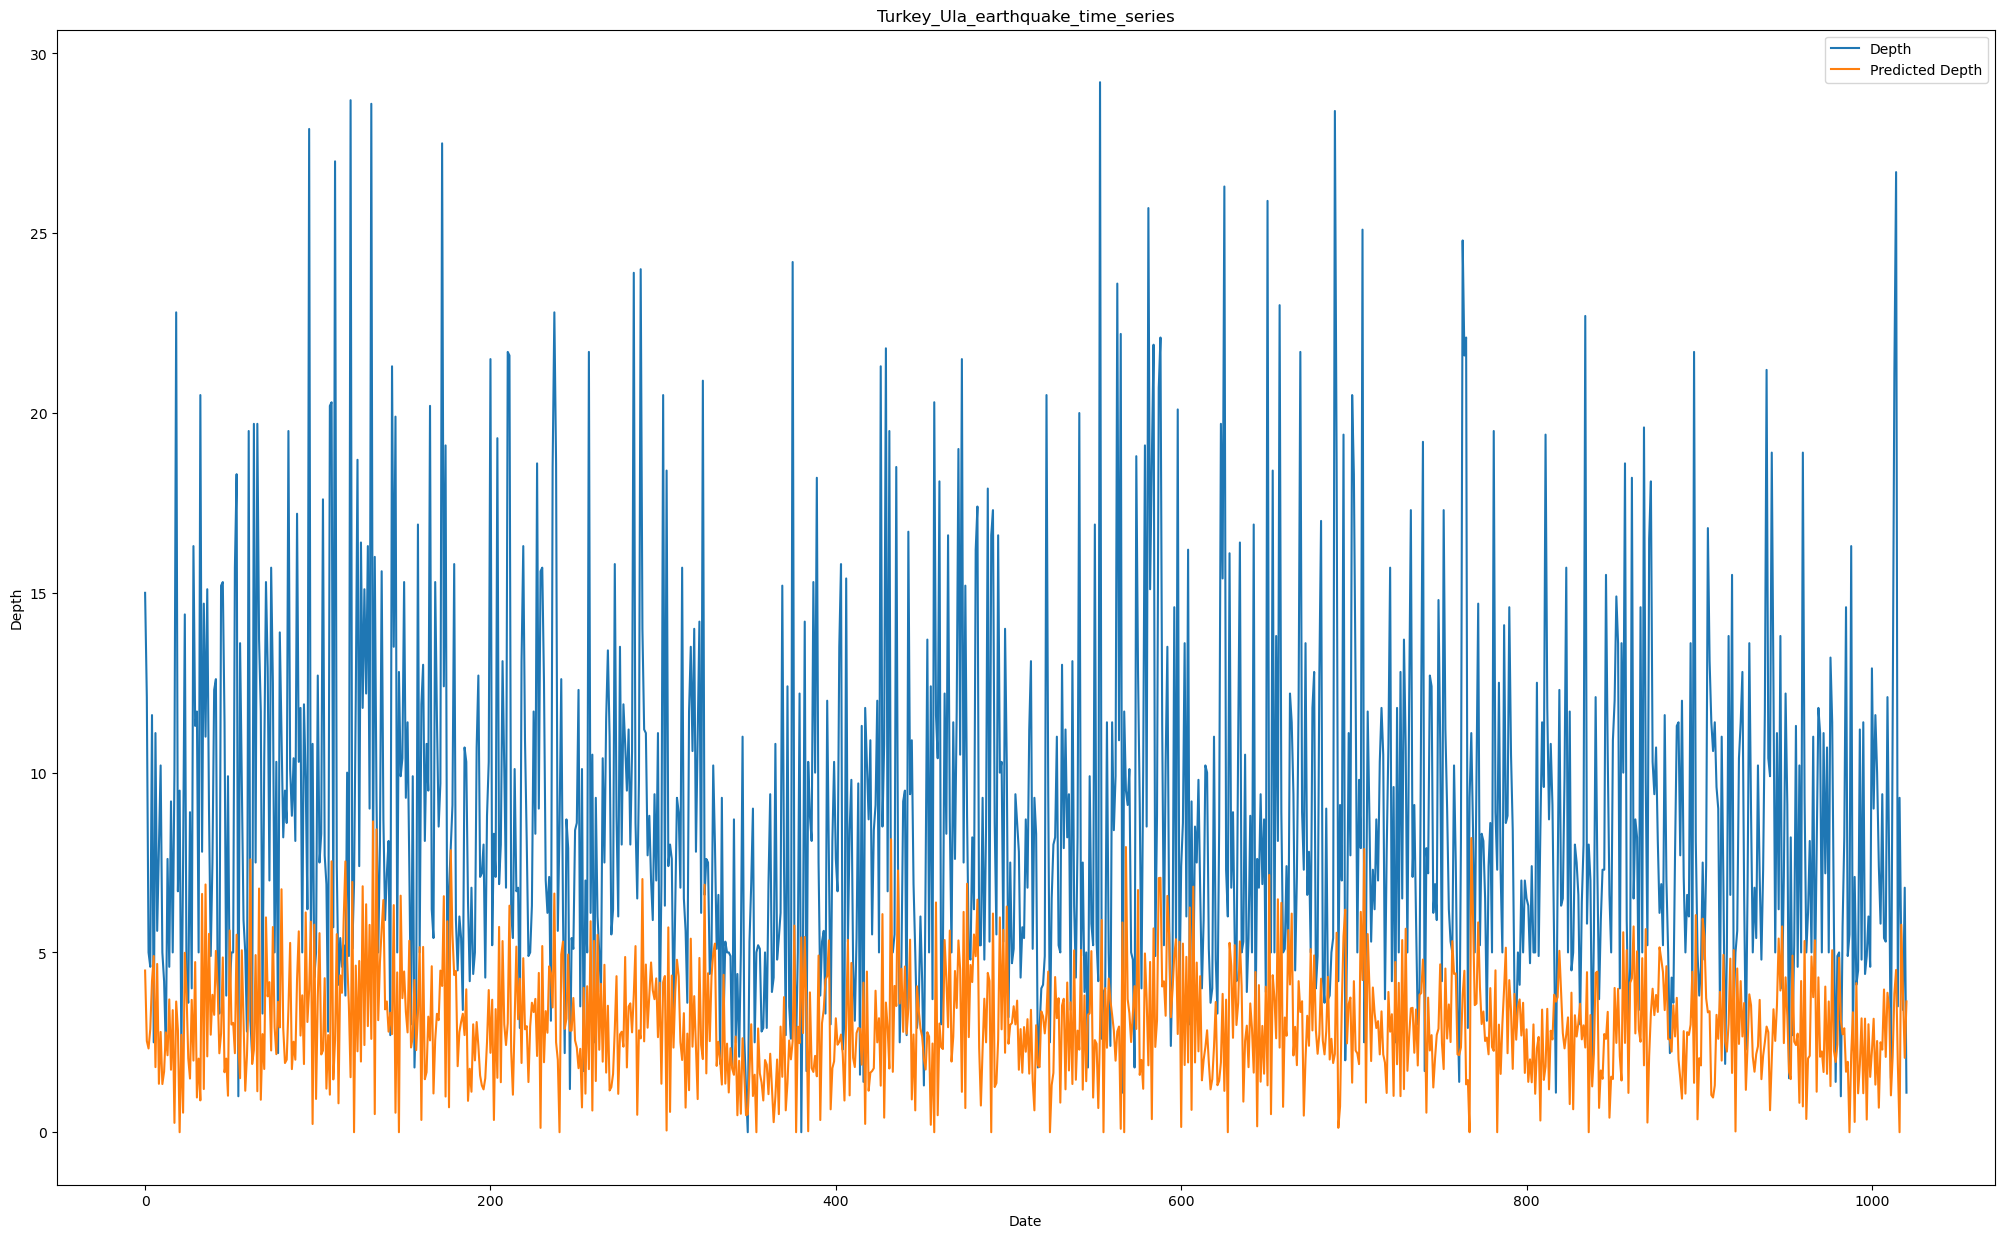

In [55]:
figure(figsize=(25,15))
plot(range(len(xts)),xts)
plot(range(len(true_preds)),true_preds)
title('Turkey_Ula_earthquake_time_series')
xlabel('Date')
ylabel('Depth')
legend(['Depth','Predicted Depth'])
show()